In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df_SAPR = pd.read_excel('SAPR3.xlsx')
df_Esmeralda = pd.read_excel('Esmeralda.xlsx')
df_Peñas = pd.read_excel('Peñas.xlsx')

In [ ]:
'''diff
Today we're here to ask and answer one simple question:
- Is our children learning?
+ Is Modulo related to plant data?
'''

In [ ]:
###STEPS
#1 - Break down datasets into times
#2 - Break down datasets into strategy
#3 - Break down datasets into type (if applicable)

### OR ###
#Concatenate the columns in the above 3 distinctions into its own column, should provide the groups we need.
#Chart various group heights


In [ ]:
#I think you can actually tier by keys in groupby, so this may not be necessary.
df_Esmeralda['Grupos'] = df_Esmeralda['Even_mon'].astype(str) +"-"+ df_Esmeralda['Escenario'].astype(str) +'-'+ df_Esmeralda['Tipo'].astype(str)

In [98]:
#most of the data is classified as "object" so we need to convert to a more useful dtype.
df_Esmeralda = df_Esmeralda.convert_dtypes()
keys = ['Alt_Ind','DAB1_Ind','DAB_Prom','Diam1_Ind','Diam2_Ind']
for item in keys:
    df_Esmeralda[item] = pd.to_numeric(df_Esmeralda[item], errors='coerce')

In [5]:
df_Esmeralda.dtypes

Fecha             datetime64[ns]
Even_mon                  string
ID                         Int64
Especie                   string
Escenario                 string
Estrategia                string
Tipo                       Int64
No_Nuc/Faj/Mod             Int64
Línea                      Int64
No_Ind                     Int64
Sup_Ind                   string
Est_Fit                    Int64
COL                       string
VB                        string
HER                       string
PAT                       string
COM                       string
DM                        string
ANE                       string
PNE                       string
Alt_Ind                  Float64
DAB1_Ind                 Float64
DAB2_Ind                   Int64
DAB_Prom                 Float64
Diam1_Ind                  Int64
Diam2_Ind                Float64
Area_cop_Ind             Float64
Observaciones             string
Grupos                    string
dtype: object

In [134]:
#Group by averages
e_grup = df_Esmeralda.groupby(by='Grupos').mean()
e_grup2 = df_Esmeralda.groupby(['Grupos','No_Nuc/Faj/Mod']).mean()
e_grup3 = df_Esmeralda.groupby(['Grupos','Especie']).mean()

In [ ]:
e_grup3

In [ ]:
plt.figure(figsize=(20,10))
e_grup['Alt_Ind'].plot(kind='bar');
#This chart shows us that average height has increased over time, with pastos being the fastest
#Vegetacion secundaria seems to be growing faster than bosque

In [ ]:
plt.figure(figsize=(20,10))
e_grup['DAB1_Ind'].plot(kind='bar');
#Grouping by diameter seems to show the same kind of trend as above, but less pronounced.

In [ ]:
plt.figure(figsize=(20,10))
e_grup['Area_cop_Ind'].plot(kind='bar');
#dang them grassy areas do be growin'
#Same trend as above but exponential. Makes sense.

In [ ]:
plt.figure(figsize=(20,10))
plt.ylabel('Altura')
e_grup2.loc['T3-Pastos limpios-1.0']['Alt_Ind'].plot(kind='bar');
#Hard to tell if there's a pattern here without plotting on a map.

In [ ]:
plt.figure(figsize=(20,10))
plt.ylabel('Altura')
e_grup2.loc['T3-Pastos limpios-2.0']['Alt_Ind'].plot(kind='bar');
#There might be some relation here. Earlier ones and later ones seem to have lower heights on average.
#Maybe there's some way to group them based on location.

In [ ]:
#Plot ALL the things!
#There actually does seem to be a grouping for pastos. Vegetacion and Bosque should be more species-dependent
for item in e_grup.index:
    plt.figure(figsize=(20,10))
    plt.ylabel('Altura Promedio')
    plt.title(item)
    e_grup2.loc[item]['Alt_Ind'].plot(kind='bar');

In [ ]:
#I'm not actually sure what this tells us
#Presumably by comparing it with veg we can get something similar
plt.figure(figsize=(20,10))
plt.ylabel('Altura')
e_grup3.loc['T3-Bosque-nan']['Alt_Ind'].plot(kind='bar');

In [ ]:
#species to species actually seems very similar. Maybe the reason veg. outstrips bosque has more to do with species composition.
plt.figure(figsize=(20,10))
plt.ylabel('Altura')
e_grup3.loc['T3-Veg. Secundaria-nan']['Alt_Ind'].plot(kind='bar');

In [95]:
#Just save all your data cleaning at the end
aggwriter = pd.ExcelWriter('SAPR3.xlsx', engine='openpyxl')
esmwriter = pd.ExcelWriter('Esmeralda.xlsx', engine='openpyxl')
penwriter = pd.ExcelWriter('Peñas.xlsx', engine='openpyxl')
df_SAPR.to_excel(aggwriter, index=False, engine='openpyxl')
df_Esmeralda.to_excel(esmwriter, index=False, engine='openpyxl')
df_Peñas.to_excel(penwriter, index=False, engine='openpyxl')
aggwriter.save()
esmwriter.save()
penwriter.save()

In [ ]:
df_Peñas.columns

In [ ]:
df_Peñas['Grupos'] = df_Peñas['Even_mon'].astype(str) +"-"+ df_Peñas['Escenario'].astype(str) +'-'+ df_Peñas['Tipo'].astype(str)

In [7]:
df_Peñas = df_Peñas.convert_dtypes()
keys = ['DAB1_Ind','Diam1_Ind','Diam2_Ind']
for item in keys:
    df_Peñas[item] = pd.to_numeric(df_Peñas[item], errors='coerce')

In [8]:
df_Peñas.dtypes


Fecha             datetime64[ns]
Even_mon                  string
ID                         Int64
Especie                   string
Escenario                 string
Estrategia                string
Tipo                       Int64
No_Nuc/Faj/Mod             Int64
Línea                      Int64
No_Ind                     Int64
Sup_Ind                   string
Est_Fit                    Int64
COL                       string
VB                        string
HER                       string
PAT                       string
COM                       string
DM                        string
ANE                       string
PNE                       string
Alt_Ind                    Int64
DAB1_Ind                   Int64
DAB2_Ind                   Int64
DAB_Prom                   Int64
Diam1_Ind                  Int64
Diam2_Ind                Float64
Area_cop_Ind             Float64
Observaciones             string
Grupos                    string
dtype: object

In [99]:
p_grup = df_Peñas.groupby(by='Grupos').mean()
p_grup2 = df_Peñas.groupby(['Grupos','No_Nuc/Faj/Mod']).mean()
p_grup3 = df_Peñas.groupby(['Grupos','Especie']).mean()

In [ ]:
#Damn Peñas be lookin' way more linear, even though that's pure coincidence
#At any rate, average height goes up over time, no sweat.
plt.figure(figsize=(20,10))
p_grup['Alt_Ind'].plot(kind='bar');

In [ ]:
#Same goes for DAB
plt.figure(figsize=(20,10))
p_grup['DAB1_Ind'].plot(kind='bar');

In [ ]:
#And area shows the same exponential growth.
plt.figure(figsize=(20,10))
p_grup['Area_cop_Ind'].plot(kind='bar');

In [ ]:
#There also appears to be some sort of relationship to location
#At this point it would probably make sense to do the following:
#1: group modulos into geographically distinct sections to see if the differences make sense
#2: Group them into units that are close or far away from fringe effects
#3: Do the same plots but for average height of each species. There's probably a nested for loop that can do this.
for item in p_grup.index:
    plt.figure(figsize=(20,10))
    plt.ylabel('Altura Promedio')
    plt.title(item)
    p_grup2.loc[item]['Alt_Ind'].plot(kind='bar');

In [32]:
df_Esmeralda['Especie'].unique()

<StringArray>
[      'Verbesina crassiramea',         'Lupinus interruptus',
       'Solanum oblongifolium',        'Ageratina boyacensis',
           'Morella pubescens',             'Ageratina ampla',
                 'Axinaea sp.',                 'Miconia sp.',
        'Croton magdalenensis',           'Viburnum tinoides',
      'Cordia cylindrostachya',         'Baccharis latifolia',
     'Palicourea angustifolia',           'Verbesina nudipes',
              'Lippia hirsuta',          'Quercus humboldtii',
   'Retrophyllum rospigliosii',          'Rhamnus goudotiana',
             'Piper nubigenum',          'Hedyosmum crenatum',
 'Weinmannia cundinamarcensis',        'Chamaedorea linearis',
           'Oreopanax incisus',         'Bocconia frutescens',
          'Juglans neotropica',       'Escallonia paniculata',
     'Smallanthus pyramidalis',    'Brunellia comocladifolia',
             'Cedrela montana',            'Guarea kunthiana',
            'Aniba panurensis',          

In [22]:
e_pastos = df_Esmeralda[df_Esmeralda['Escenario']=='Pastos limpios']

In [130]:
e_grup4  = e_pastos.groupby(['Tipo','Especie','No_Nuc/Faj/Mod']).mean()
e_index1 = e_pastos.groupby(['Especie']).mean()
e_index1 = e_index1.index

In [43]:
e_index1

Index(['Ageratina ampla', 'Ageratina boyacensis', 'Axinaea sp.',
       'Baccharis latifolia', 'Bocconia frutescens', 'Cedrela montana',
       'Chamaedorea linearis', 'Cordia cylindrostachya',
       'Croton magdalenensis', 'Escallonia paniculata', 'Hedyosmum crenatum',
       'Helecho', 'Juglans neotropica', 'Lippia hirsuta',
       'Lupinus interruptus', 'Miconia sp.', 'Morella pubescens',
       'Oreopanax incisus', 'Palicourea angustifolia', 'Piper nubigenum',
       'Quercus humboldtii', 'Retrophyllum rospigliosii', 'Rhamnus goudotiana',
       'Smallanthus pyramidalis', 'Solanum oblongifolium',
       'Verbesina crassiramea', 'Verbesina nudipes', 'Viburnum tinoides',
       'Weinmannia cundinamarcensis'],
      dtype='object', name='Especie')

In [141]:
df_Esmeralda['Grupos'].unique()

<StringArray>
[ 'T1-Pastos limpios-1.0',  'T1-Pastos limpios-2.0',          'T1-Bosque-nan',
 'T1-Veg. Secundaria-nan',  'T2-Pastos limpios-1.0',  'T2-Pastos limpios-2.0',
          'T2-Bosque-nan', 'T2-Veg. Secundaria-nan',  'T3-Pastos limpios-1.0',
  'T3-Pastos limpios-2.0',          'T3-Bosque-nan', 'T3-Veg. Secundaria-nan']
Length: 12, dtype: string

In [56]:
len(e_grup4.loc[1].loc['Ageratina ampla']['Alt_Ind'])

35

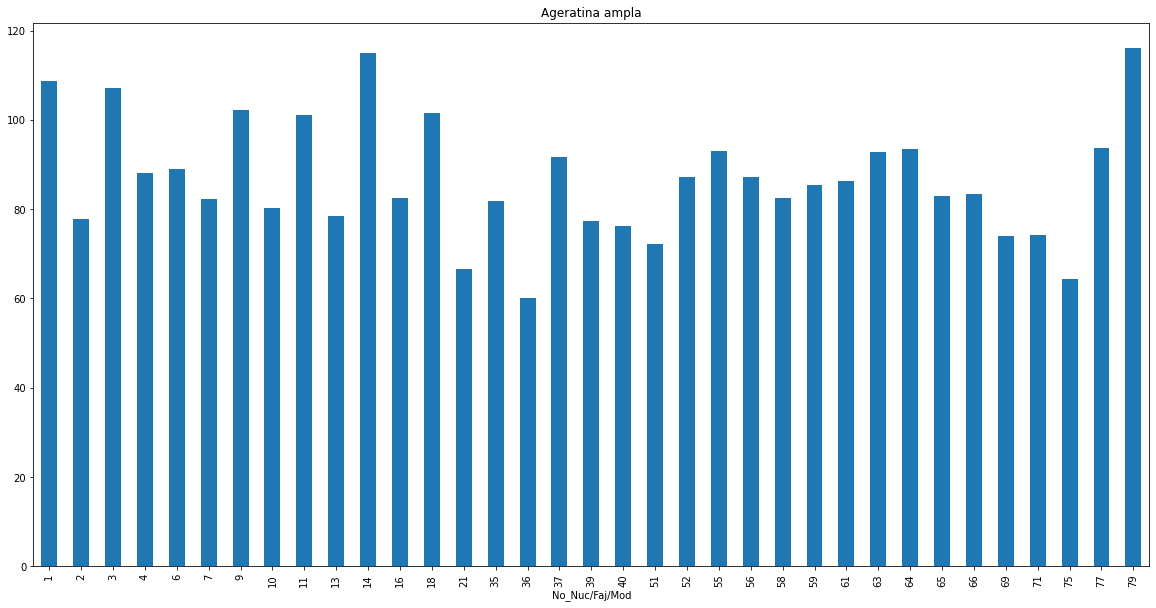

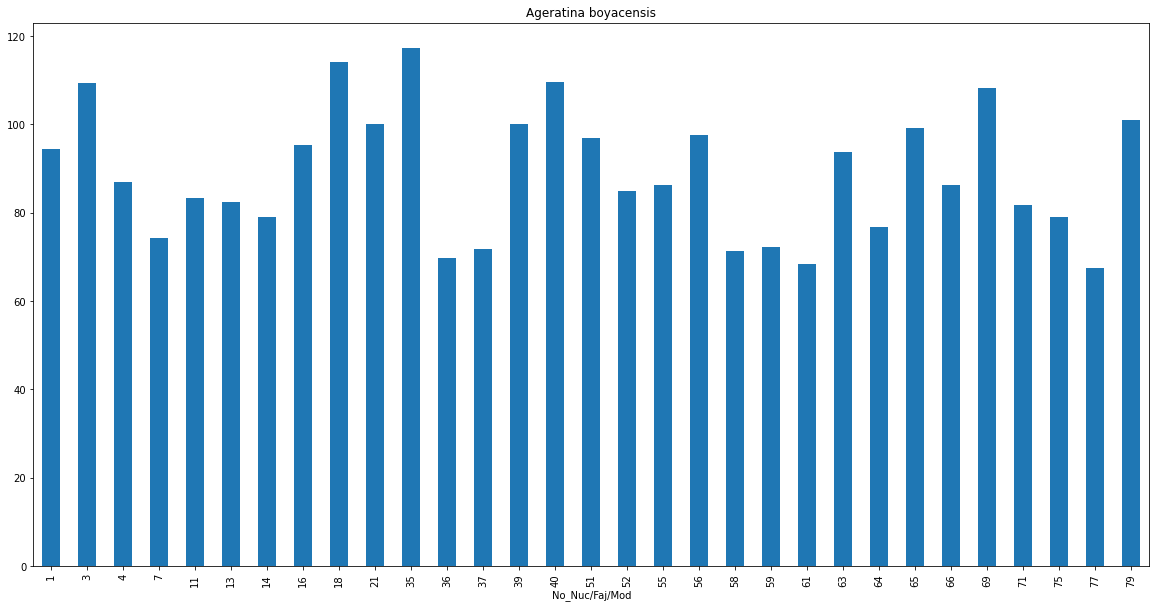

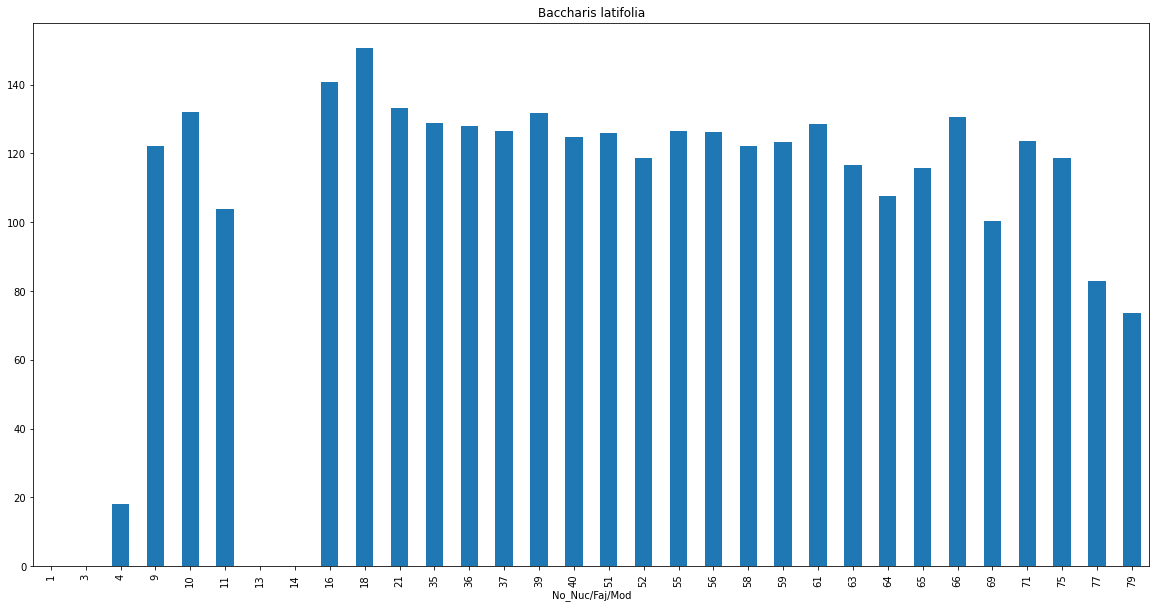

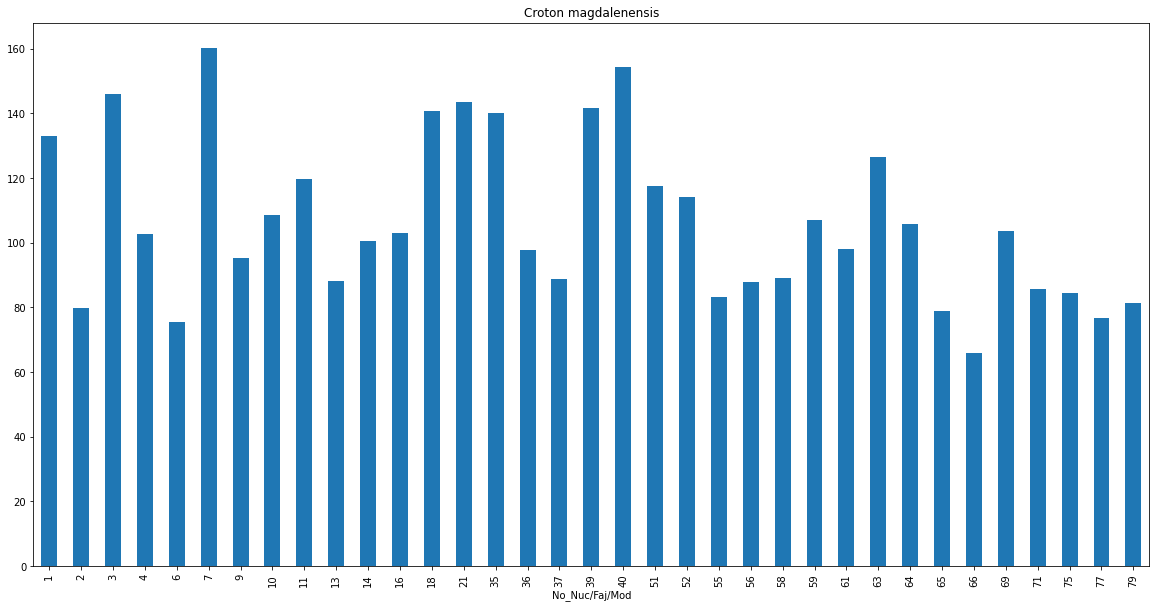

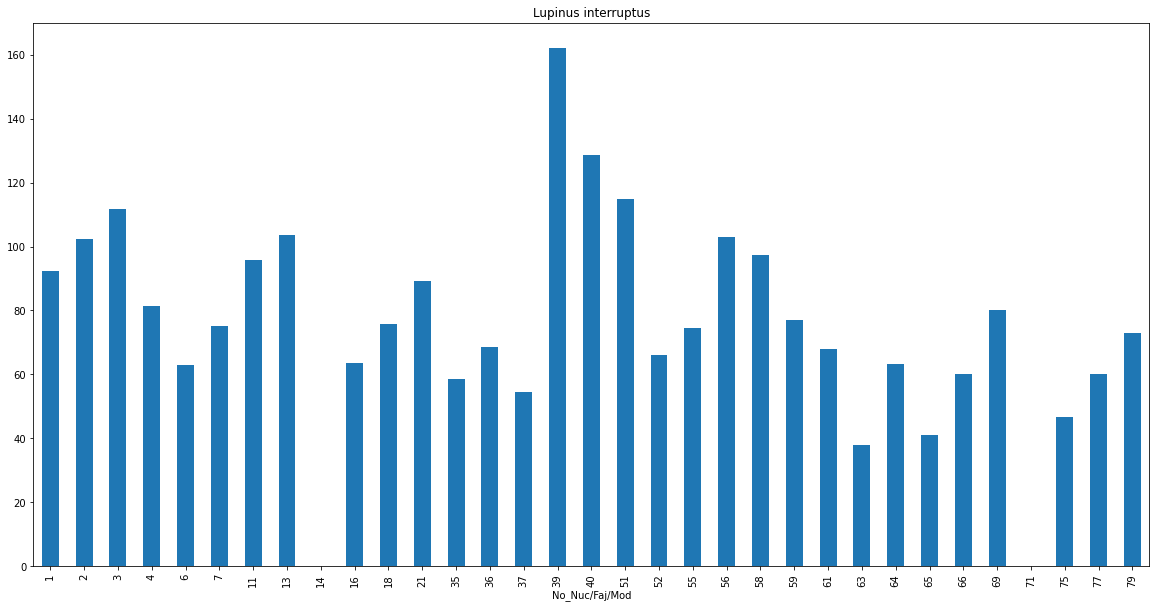

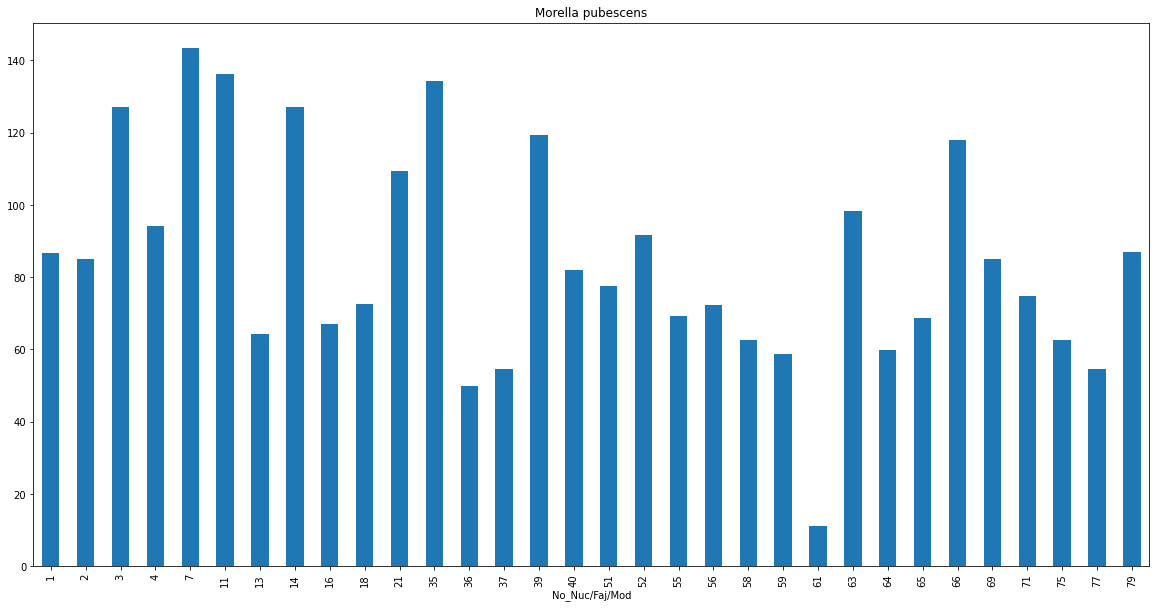

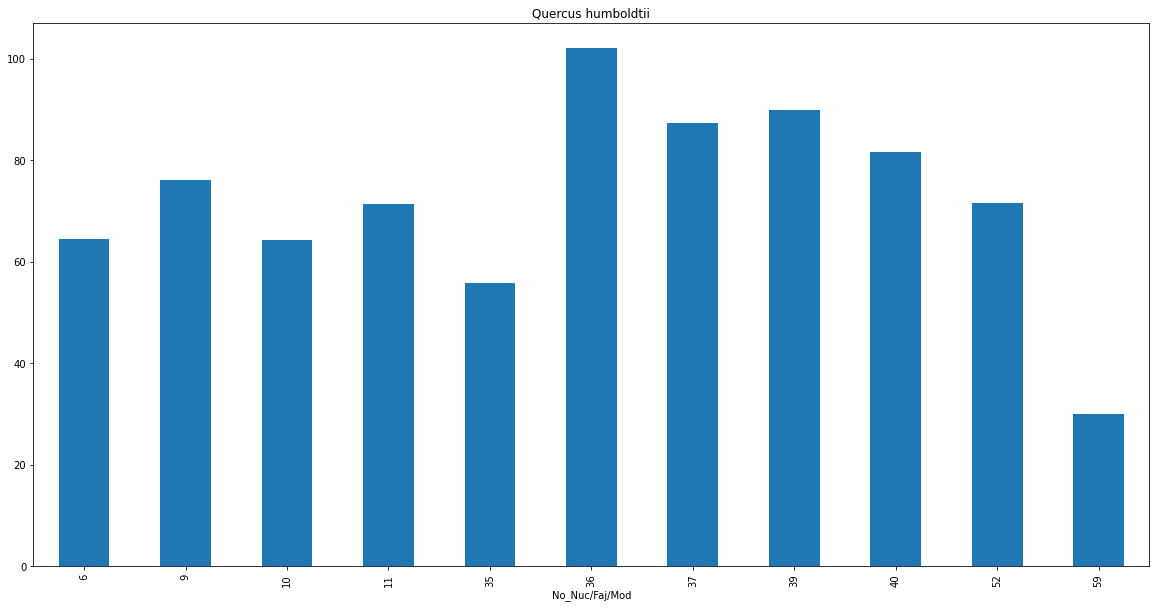

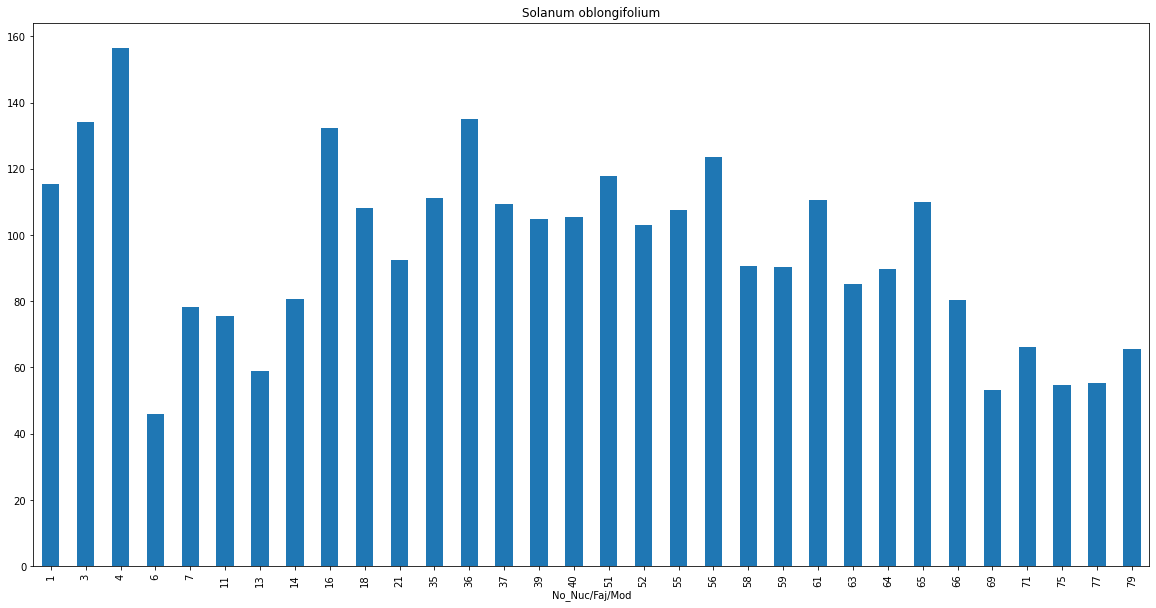

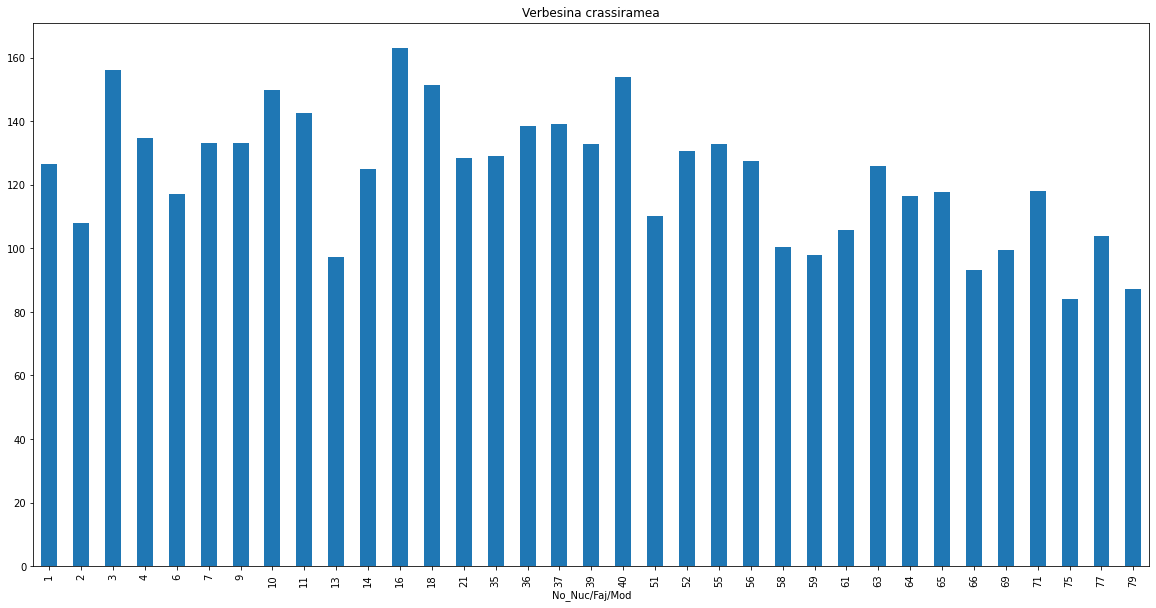

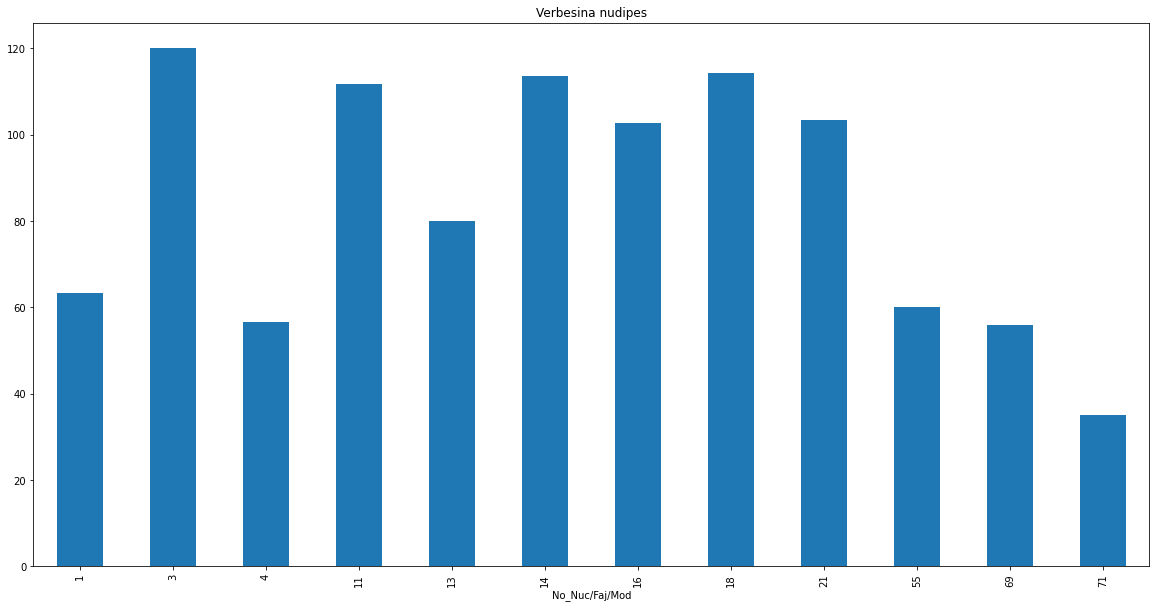

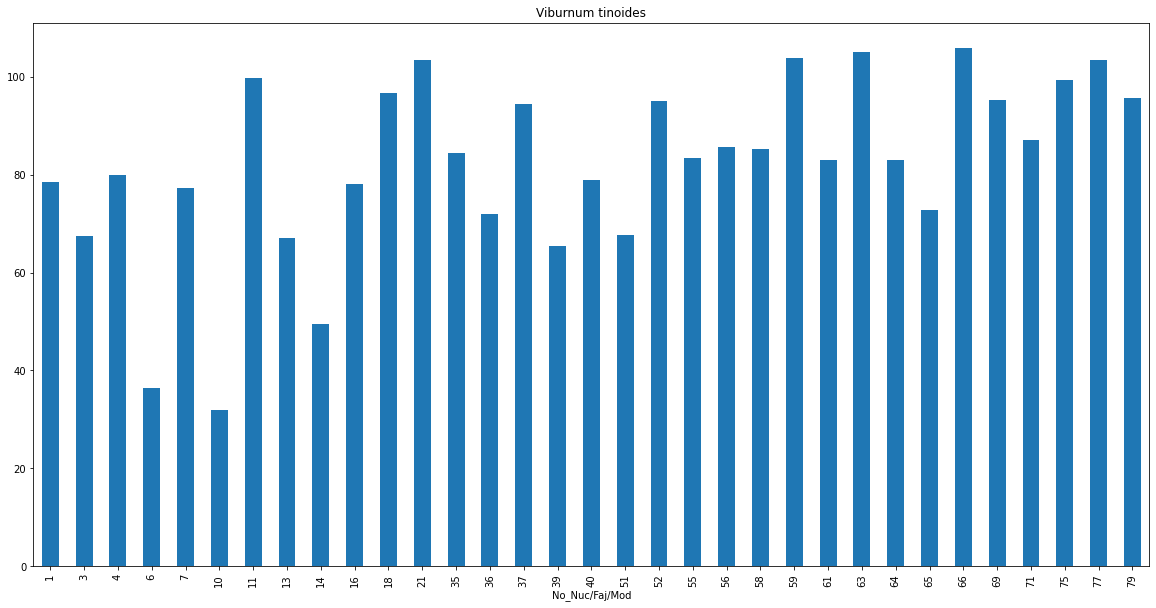

In [58]:
#Plot species growth curves if it's present in 10 or more modules. This is just for T1
for item in e_index1:

    try:
        
        if len(e_grup4.loc[1].loc[item]['Alt_Ind']) > 9:
            plt.figure(figsize=(20,10))
            plt.title(label=item)
            e_grup4.loc[1].loc[item]['Alt_Ind'].plot(kind='bar');
        
    except:
        continue

<AxesSubplot:xlabel='No_Nuc/Faj/Mod'>

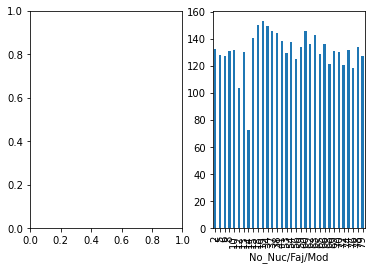

In [121]:
#Let's try to construct a subplot array
#plt.subplot(nrows, nclols, index)
fig, axs = plt.subplots(1,2)
a1.plot(kind='bar')
a2.plot(kind='bar')

In [154]:
a1=e_grup2.loc['T1-Pastos limpios-1.0']['Alt_Ind']
a2=e_grup2.loc['T2-Pastos limpios-1.0']['Alt_Ind']
a3=e_grup2.loc['T3-Pastos limpios-1.0']['Alt_Ind']

In [155]:
new_df = pd.DataFrame({'T1':a1, 'T2':a2, 'T3':a3})

array([[<AxesSubplot:title={'center':'T1'}, xlabel='No_Nuc/Faj/Mod'>,
        <AxesSubplot:title={'center':'T2'}, xlabel='No_Nuc/Faj/Mod'>,
        <AxesSubplot:title={'center':'T3'}, xlabel='No_Nuc/Faj/Mod'>]],
      dtype=object)

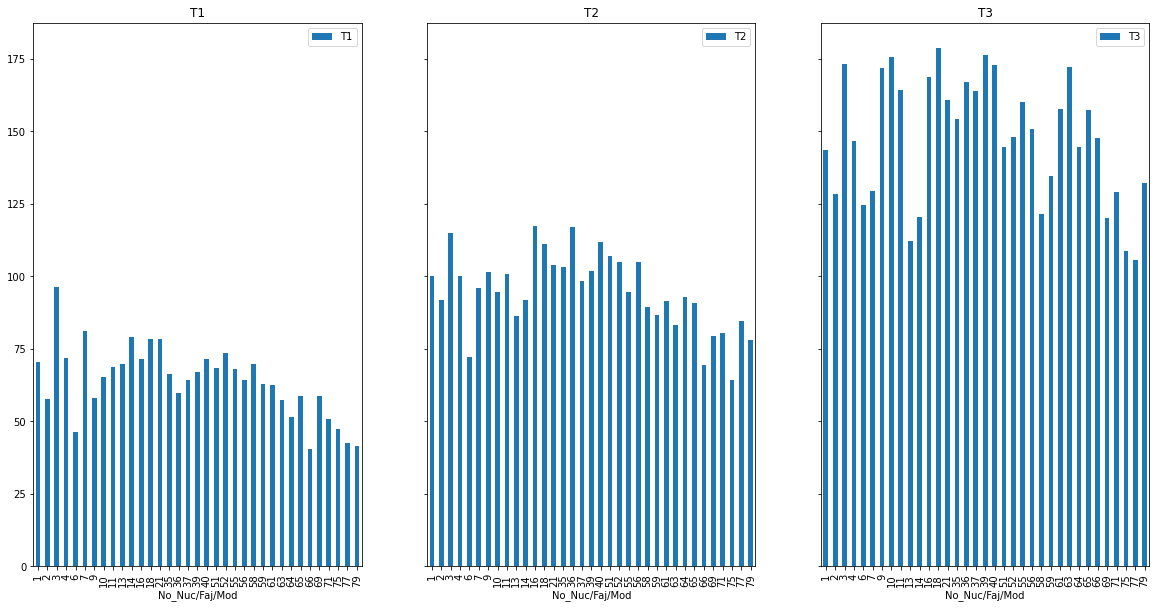

In [166]:
new_df.plot(kind='bar', subplots=True, layout=(1,3), figsize=(20,10), sharey=True, color='tab:blue')

<AxesSubplot:xlabel='No_Nuc/Faj/Mod'>

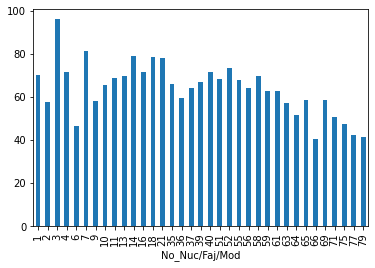

In [144]:
e_grup2.loc['T1-Pastos limpios-1.0']['Alt_Ind'].plot(kind='bar')


<AxesSubplot:xlabel='No_Nuc/Faj/Mod'>

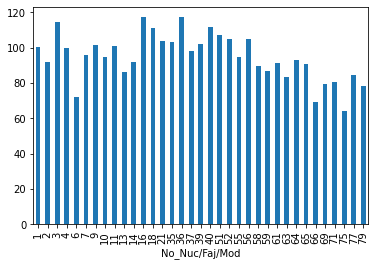

In [145]:
e_grup2.loc['T2-Pastos limpios-1.0']['Alt_Ind'].plot(kind='bar')

In [158]:
df_Esmeralda.describe()

,ID,Tipo,No_Nuc/Faj/Mod,Línea,No_Ind,Est_Fit,Alt_Ind,DAB1_Ind,DAB2_Ind,DAB_Prom,Diam1_Ind,Diam2_Ind,Area_cop_Ind
count,11943.000000,10326.000000,11943.000000,10326.000000,11943.000000,11235.000000,11175.000000,11171.000000,0,11756.000000,11111.000000,11111.000000,11934.000000
mean,1991.002596,1.619504,41.444277,3.519659,23.682241,1.579350,105.095714,14.260120,<NA>,13.566928,73.339843,65.155432,3055.980602
std,1149.268285,0.485532,27.091338,1.668727,18.302216,1.258406,59.863133,9.131792,<NA>,9.558347,45.476678,44.732420,4154.042246
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,<NA>,0.000000,0.000000,0.000000,0.000000
25%,996.000000,1.000000,13.000000,2.000000,7.000000,1.000000,60.000000,8.000000,<NA>,7.000000,39.000000,33.000000,522.000000
50%,1991.000000,2.000000,41.000000,3.000000,20.000000,1.000000,92.000000,12.000000,<NA>,11.000000,62.000000,53.000000,1387.000000
75%,2986.000000,2.000000,65.000000,5.000000,35.000000,3.000000,136.000000,18.000000,<NA>,18.000000,98.000000,86.000000,3818.000000
max,3986.000000,2.000000,107.000000,7.000000,68.000000,4.000000,600.000000,226.000000,<NA>,226.000000,336.000000,1033.000000,57331.500000
